# Galaxus home page stats

In [8]:
import pandas as pd
import numpy as np

## Load data set

In [ ]:
# import dataframe from CSV file
df = pd.read_csv('data.csv', names=['date', 'time', 'latency', 'details', 'cache', 'esent', 'esent_details', 'server', 'es_index', 'es_template'])

# convert datetime from string to actual datetime
df['datetime'] = pd.to_datetime(df['date']+' '+df['time'])

df

In [10]:
df['latency'].describe()

count     9859.000000
mean       390.344558
std       2078.750708
min        109.000000
25%        202.000000
50%        244.000000
75%        302.000000
max      89110.000000
Name: latency, dtype: float64

In [11]:
df['datetime'].describe()

count                    9859
unique                   9859
top       2016-11-10 07:46:00
freq                        1
first     2016-11-09 22:36:00
last      2016-11-21 21:45:00
Name: datetime, dtype: object

## Latency distribution

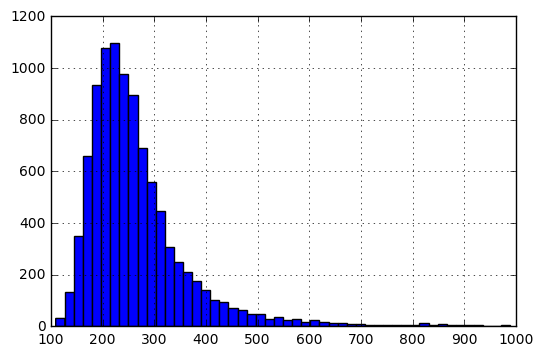

In [14]:
# remove outliers
df_filtered = df[df['latency'] <=1000]

# plot distribution chart
%matplotlib inline
df_filtered['latency'].hist(bins=50)

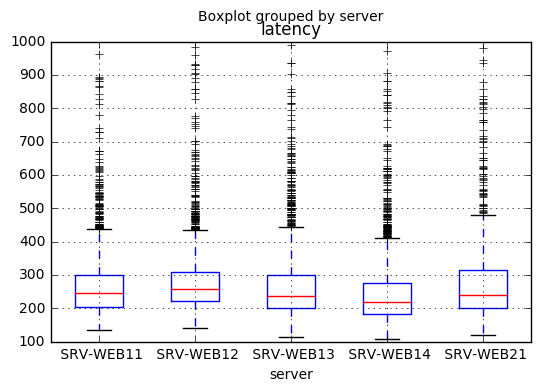

In [21]:
# boxplot by server name: are the different servers different in latency?
df_filtered.boxplot(column='latency', by='server')

## Load balancing

In [25]:
# do the different hosts receive a similar number of requests?
df.groupby(df['server'])['datetime'].count()

server
 SRV-WEB11    2431
 SRV-WEB12    2519
 SRV-WEB13    1685
 SRV-WEB14    2411
 SRV-WEB21     813
Name: datetime, dtype: int64

## Time series of latency

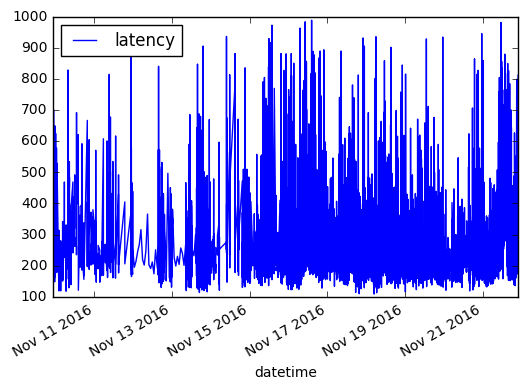

In [29]:
# now plot latency over time
myplot = df_filtered.plot( x='datetime', y='latency')

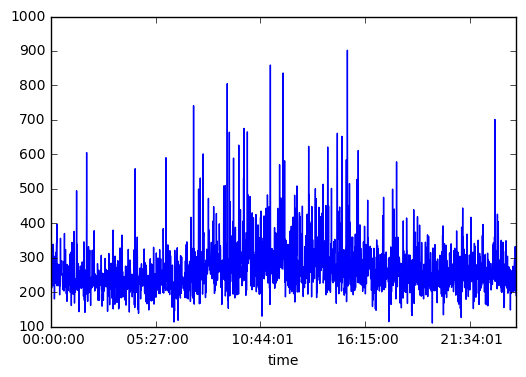

In [27]:
# does latency change at different times of the day?
hourly_latency=df_filtered.groupby(df_filtered['time'])['latency'].mean()
myplot2 = hourly_latency.plot(x='time', y='latency')